<a href="https://colab.research.google.com/github/premkumar6/GRIP-DataScience-Intern/blob/main/Sol3_Retails_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [5]:
dataset = pd.read_csv("/content/SampleSuperstore.csv")

In [6]:
dataset.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Checking if there's any NULL values 

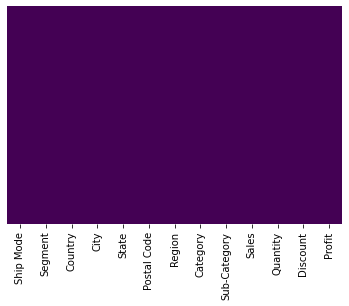

In [10]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
catagorical_features = [i for i in dataset.columns if dataset.dtypes[i] == 'object']
for j in catagorical_features:
    print('\033[1m' + j + '\033[0m')
    print(sorted(dataset[j].unique()))

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

In [12]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

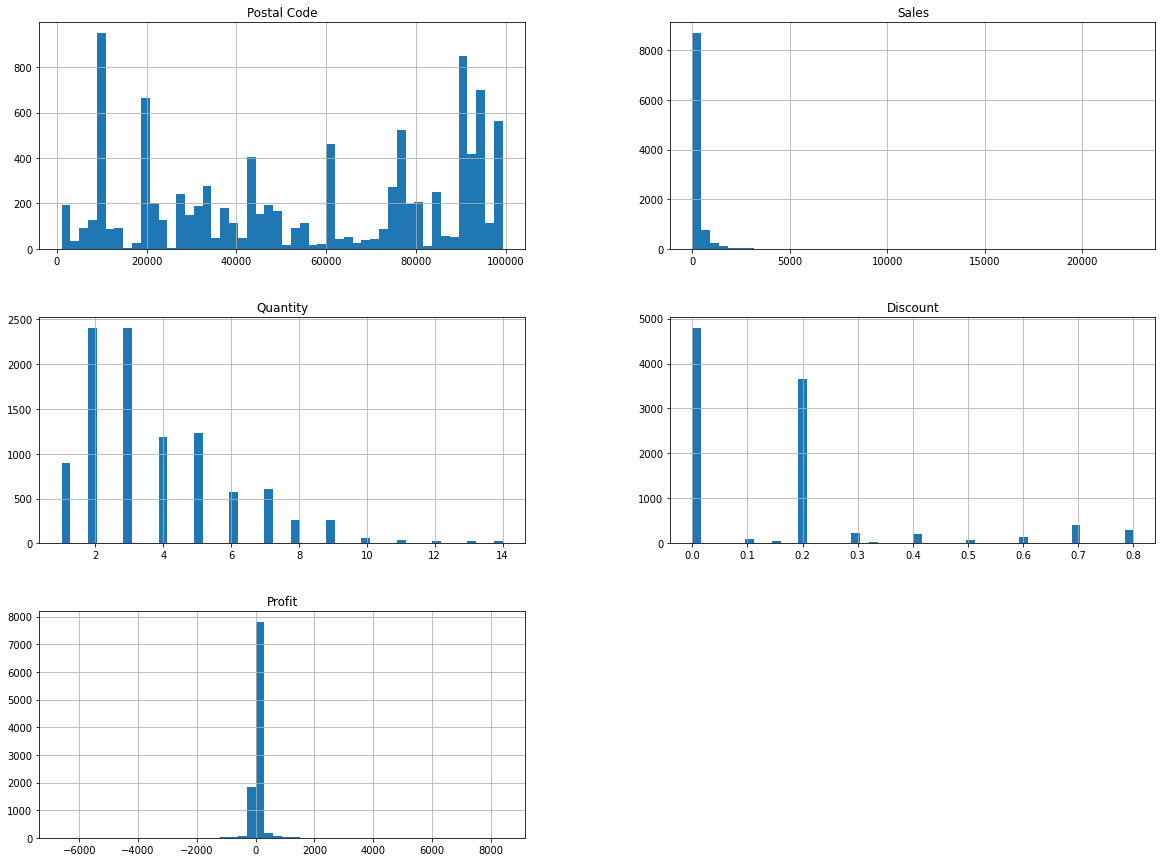

In [13]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# detect duplicated records
dataset[dataset.duplicated(subset = None, keep = False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [15]:
dataset = pd.DataFrame.drop_duplicates(dataset)
dataset.shape

(9977, 13)

In [16]:
dataset = dataset.drop(['Country'], axis=1)
dataset = dataset.drop(['Postal Code'], axis=1)

In [17]:
dataset.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


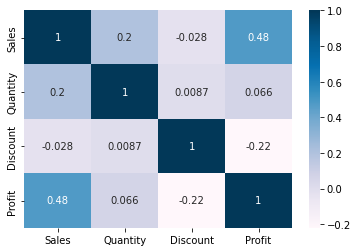

In [18]:
sns.heatmap(dataset.corr(), cmap = 'PuBu', annot = True)
plt.show()

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


In [20]:
dataset.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [21]:
round(sum(dataset['Sales']),2)

2296195.59

In [22]:
sum(dataset['Quantity'])

37820

In [23]:
round(sum(dataset['Discount'],2))

1561

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


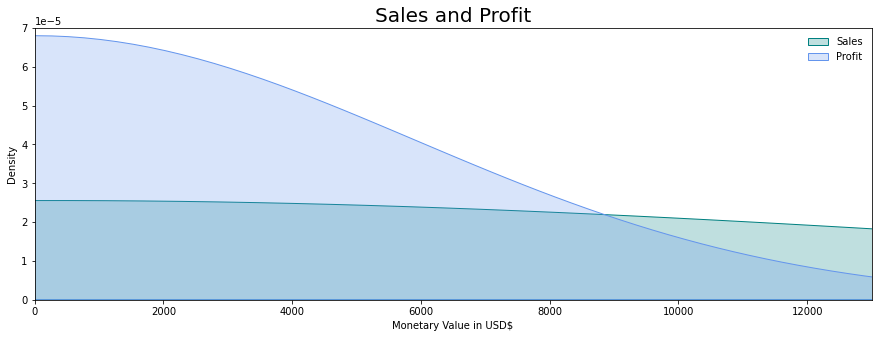

In [24]:
plt.figure(figsize=(15,5))
#plot sales and profit for comparison

sns.kdeplot(dataset['Sales'],color='Teal',label = 'Sales', shade = True, bw = 25)
sns.kdeplot(dataset['Profit'],color='CornflowerBlue',label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


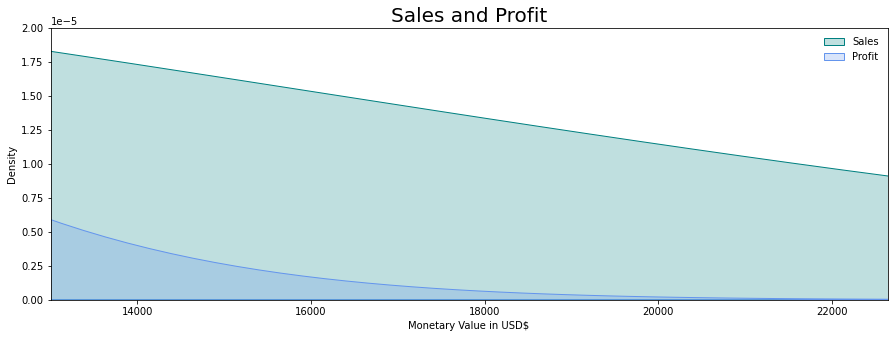

In [25]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(dataset['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(dataset['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([13000, 22640])
plt.ylim([0, 0.00002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

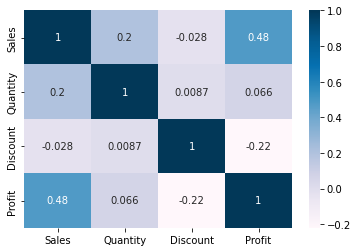

In [26]:
sns.heatmap(dataset.corr(), cmap = 'PuBu', annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

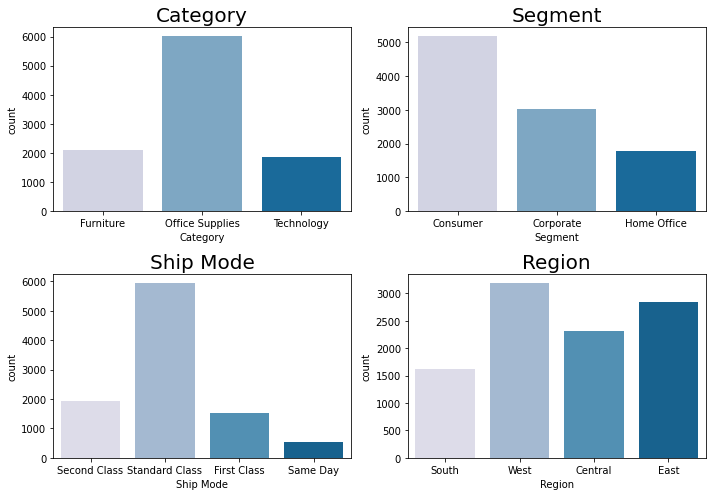

In [27]:
# count of each Category, Segment, Ship Mode, and Region
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
sns.countplot(dataset['Category'], ax = axs[0][0], palette = 'PuBu')
sns.countplot(dataset['Segment'], ax = axs[0][1], palette = 'PuBu')
sns.countplot(dataset['Ship Mode'], ax = axs[1][0], palette = 'PuBu')
sns.countplot(dataset['Region'], ax = axs[1][1], palette = 'PuBu')
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

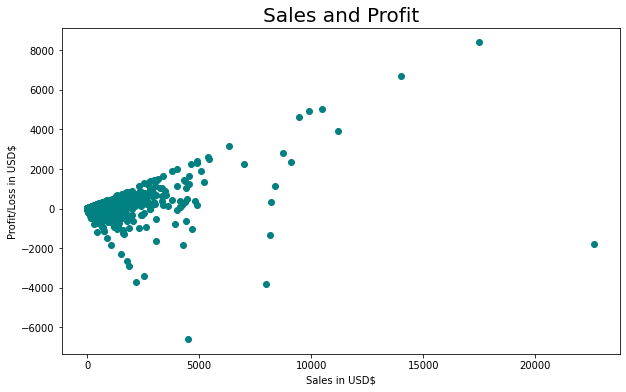

In [31]:
fig , ax = plt.subplots(figsize=(10,6))
ax.scatter(dataset["Sales"] , dataset["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()


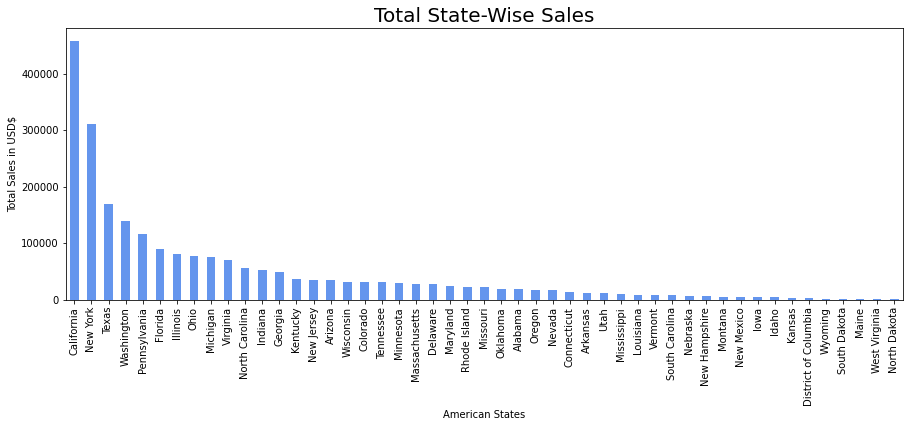

In [36]:
df_state_sales = dataset.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

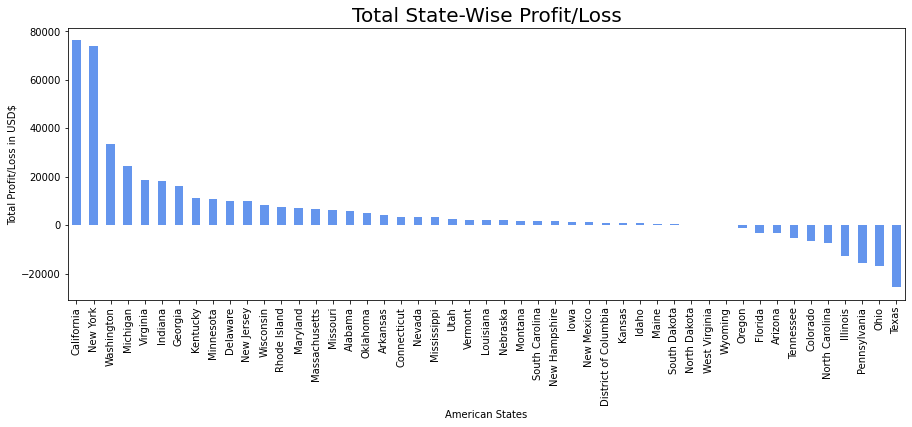

In [37]:
df_state_profit = dataset.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

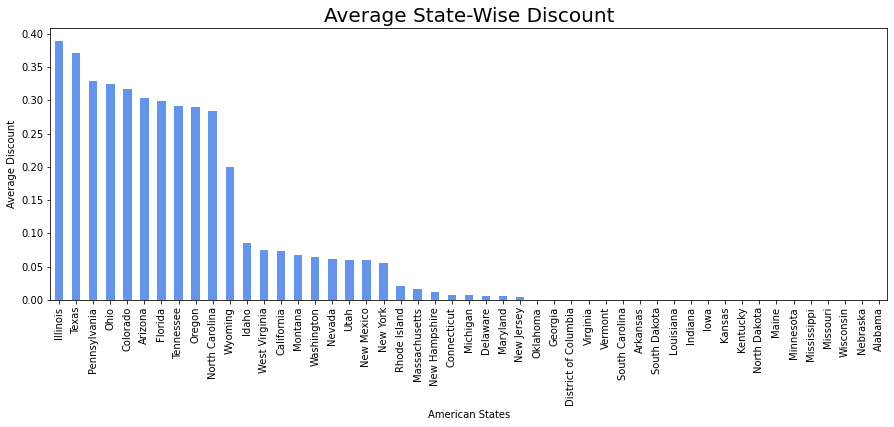

In [38]:
df_state_profit = dataset.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

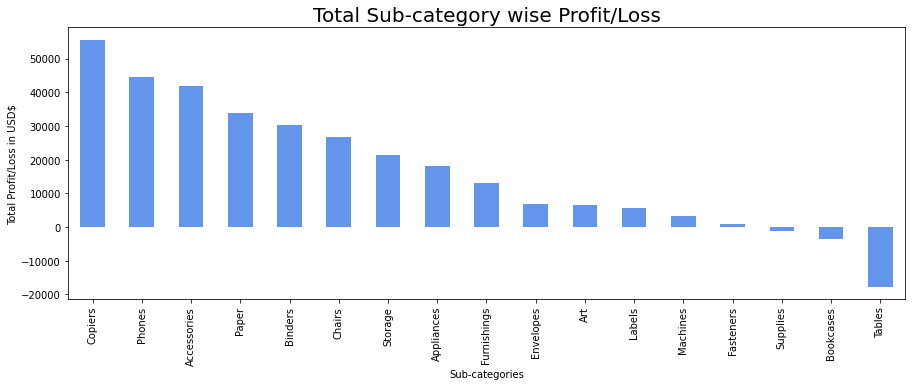

In [39]:
df_state_profit = dataset.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('Sub-categories')
plt.title('Total Sub-category wise Profit/Loss', fontsize = 20)
plt.show()